In [81]:
import requests
from requests.exceptions import HTTPError

import math
import pandas as pd
from decimal import Decimal
from pandas.io.json import json_normalize
import json

import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import truncnorm, norm

In [82]:
#Variables/Params
api_key = '46583da07984f6f5e5acc0442fad24656e164280da7811e9aefa8bcfc9d1' #defi pulse

In [83]:
#get json query
def defipulse_getdata(request, api_key):
    try:
        response = requests.get('https://data-api.defipulse.com/api/v1/defipulse/api/' + request +'?api-key=' + api_key + '&period=1y')
        response.raise_for_status()
        # access JSOn content
        return response.json()
        #print("Entire JSON response")
        #print(api_output[0]) #validate response from API

    except HTTPError as http_err:
        return (f'HTTP error occurred: {http_err}')
    except Exception as err:
        return (f'Other error occurred: {err}')

#convert to callable dataframe
def get_lendrates(data):
    df = pd.DataFrame.from_dict(data)
    data = pd.json_normalize(df['lend_rates'])
    data = pd.merge(pd.to_datetime(df['timestamp'],unit='s').dt.date, data, left_index=True, right_index=True)
    data = data.set_index('timestamp')
    return data

In [84]:
lendingdata = get_lendrates(defipulse_getdata('getLendingHistory',api_key))

In [85]:
#normalise datetime and index by date

Text(0, 0.5, 'Annual Yield %')

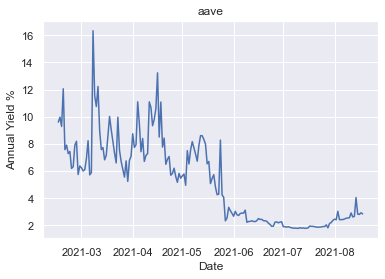

In [89]:
dat = pd.DataFrame(lendingdata)
protocol = 'aave'

protocoldat = dat[protocol]


plt.plot(protocoldat)
plt.title(protocol)
plt.xlabel('Date')
plt.ylabel('Annual Yield %')

,aave_x,aave_y
timestamp,,
2020-08-31,NaN,NaN
2020-09-30,NaN,NaN
2020-10-31,NaN,NaN
2020-11-30,NaN,NaN
2020-12-31,NaN,NaN
2021-01-31,NaN,NaN
2021-02-28,1.743066,7.990908
2021-03-31,2.358808,7.930873
2021-04-30,2.069242,8.094755


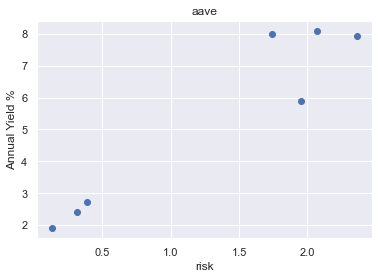

In [153]:
protocoldat = pd.DataFrame(protocoldat)
protocoldat = protocoldat.set_index(pd.to_datetime(protocoldat.index)) #set index

protocoldat_std_month = protocoldat.resample('M').std()
protocoldat_avg_month = protocoldat.resample('M').mean()

monthly_projectdata = protocoldat_std_month.merge(protocoldat_avg_month, left_index=True, right_index=True)
monthly_projectdata.dropna()

#[mdates.date2num(datetime.strptime(i, "%Y-%m-%d")) for i in monthly_projectdata[0]]

plt.scatter(monthly_projectdata['aave_x'],monthly_projectdata['aave_y'])
plt.title(protocol)
plt.xlabel('risk')
plt.ylabel('Annual Yield %')
monthly_projectdata